In [150]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
import random

In [143]:
def generate_connection_matrix(num_squares): 

    connection_matrix = np.zeros((num_squares, num_squares))
    nums = list(range(1, num_squares + 1))
    
    connection_matrix[0] = nums # creating 1st row
    for row in nums:
        for col in nums:
            allowed_nums = list(range(1, num_squares + 1))
            if connection_matrix[row - 1][col - 1] == 0: 
                # Checking the numbers already in this row and removing them from allowed nums
                for num in connection_matrix[row - 1]:
                    if num in allowed_nums: allowed_nums.remove(num)
                
                # Checking the numbers already in this column
                for num in [connection_matrix[_][col - 1] for _ in range(num_squares)]:
                    if num in allowed_nums: allowed_nums.remove(num)
                
                try: 
                    connection_matrix[row - 1][col - 1] = allowed_nums[0]
                except:
                    None

    return connection_matrix.astype(int)

mat_4 = generate_connection_matrix(4)
mat_64 = generate_connection_matrix(64)

In [395]:
def generate_connection_matrix_alternate(num_squares): 

    connection_matrix = np.zeros((num_squares, num_squares))
    nums = list(range(1, num_squares + 1))
    
    random.shuffle(nums)
    connection_matrix[0] = nums # creating 1st row
    for row in nums:
        for col in nums:
            allowed_nums = list(range(1, num_squares + 1))
            if connection_matrix[row - 1][col - 1] == 0: 
                # Checking the numbers already in this row and removing them from allowed nums
                for num in connection_matrix[row - 1]:
                    if num in allowed_nums: allowed_nums.remove(num)
                
                # Checking the numbers already in this column
                for num in [connection_matrix[_][col - 1] for _ in range(num_squares)]:
                    if num in allowed_nums: allowed_nums.remove(num)
                
                try: 
                    connection_matrix[row - 1][col - 1] = random.choice(allowed_nums)
                   # connection_matrix[row - 1][col - 1] = allowed_nums[-1]
                except:
                    None

    return connection_matrix.astype(int)

mat_4 = generate_connection_matrix(4)
mat_64 = generate_connection_matrix(64)

In [470]:
generate_connection_matrix_alternate(4)

array([[3, 1, 4, 2],
       [0, 4, 1, 3],
       [4, 3, 2, 1],
       [2, 0, 3, 4]])

In [397]:
def generate_hypercube_vertices(dimension):
    vertices = []
    def genbin(n, bs=''):
        if len(bs) == n:
            vertices.append(bs)
        else:
            genbin(n, bs + '0')
            genbin(n, bs + '1')

    genbin(dimension)
    return vertices
#generate_hypercube_vertices(4)

def find_1s(binary_string):
    binary_list = list(binary_string)
    idxs = []
    for char in binary_list:
        if char == "1":
            idx = binary_list.index(char) + 1
            idxs.append(idx)
            binary_list[idx - 1] = 0
    return idxs
#find_1s("0111")

def colour_vertices(connection_matrix):
    dimension = len(connection_matrix)
    vertices = generate_hypercube_vertices(dimension)
    colours = []

    for vertex in vertices:
        flipped_dimensions = find_1s(vertex)
        colour = 1
        for dim in flipped_dimensions:
            new_colour = int(connection_matrix[dim - 1][colour - 1])
            colour = new_colour
        colours.append(colour)
    
    hypercube = {}
    n = 0 
    for vertex in vertices:
        hypercube[vertex] = colours[n]
        n+=1
    return hypercube
#colour_vertices(4)

def find_colour(coins_string, connection_matrix):
    flipped_dimensions = find_1s(coins_string)
    colour = 1
    for dim in flipped_dimensions:
        new_colour = int(connection_matrix[dim-1][colour-1])
        colour = new_colour
    return colour
#find_colour("1111", mat_4)

def flip_this_coin(key_position, coins_string, connection_matrix):
    current_colour = find_colour(coins_string, connection_matrix)
    #print(current_colour)
    #print(connection_matrix)
    column = [int(connection_matrix[_][current_colour - 1]) for _ in range(len(connection_matrix))]
    #print(column)
    flip_dimension = column.index(key_position) + 1 

    return flip_dimension 
#flip_this_coin(3,"0010",mat_4)

def find_nicest_board(num_squares):
    """Finds the squarest looking board for a given number of squares"""
    current_board = (1,num_squares)
    multiples = []
    for n in range(2,int(num_squares)):
        for m in range(2,int(num_squares)):
            if n*m == num_squares:
                #print(num_squares,n,m)
                multiples.append((n,m))
    
    if multiples != []:
        diffs = [np.abs(multiple[0]-multiple[1]) for multiple in multiples]
        current_board = multiples[diffs.index(min(diffs))]
        #print(num_squares,diffs,multiples,current_board)
    
    return current_board

def flip_nth_bit(n, binary_string):
    binary_list = list(binary_string)
    if binary_list[n-1] == '0':
        binary_list[n-1] = '1'
    else:
        binary_list[n-1] = '0'
    return ''.join(binary_list)
#flip_nth_bit(4,'100001')

def create_board_from_coins_list(coins_string):
    coins_list = list(coins_string)
    num_squares = len(coins_list)
    board_shape = find_nicest_board(num_squares)
    board = []

    index = 0
    for _ in range(board_shape[0]):
        row = coins_list[index:index+board_shape[1]]  
        board.append([int(_) for _ in row])
        index += board_shape[1]
    
    return board

heads_test = "110110101011"
#create_board_from_coins_list(heads_test)

(True,
 array([[4, 3, 2, 1],
        [2, 1, 4, 3],
        [3, 4, 1, 2],
        [1, 2, 3, 4]]))

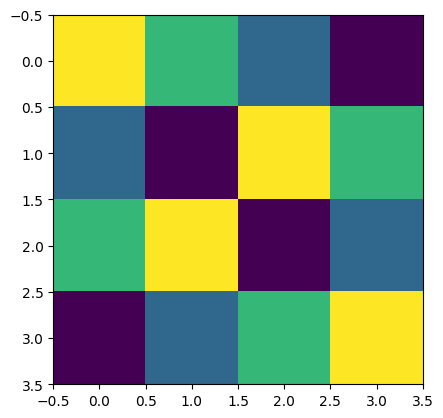

In [519]:
def testing(connection_matrix_function, num_squares):
    coin_strings = generate_hypercube_vertices(num_squares)
    matrix = connection_matrix_function(num_squares)

    fails = []
    for key_position in range(1,num_squares + 1):
        try: 
            for coin_string in coin_strings:
                initial_board = create_board_from_coins_list(coin_string)
                #print(initial_board, coin_string)
                flip_coin = flip_this_coin(key_position, coin_string, matrix)
                new_coin_list = flip_nth_bit(flip_coin, coin_string)
                new_board = create_board_from_coins_list(new_coin_list)
                new_colour = find_colour(new_coin_list, matrix)
                #print(f'key = {key_position}', f'initial board = {initial_board}', 
                    #f'flip {flip_coin}', f'new_board {new_board}', 
                    #f'new_colour {new_colour}')
                if key_position != new_colour:
                    fails.append(f'key = {key_position}, initial board = {initial_board}, flip {flip_coin}, new_board {new_board}, new_colour {new_colour}')
        except:
            fails.append(f'key = {key_position}, initial board = {initial_board}, flip {flip_coin}, new_board {new_board}, new_colour {new_colour}')

    if fails == []:
        return True, plt.imshow(matrix), matrix
    else: 
        return False, plt.imshow(matrix), matrix, fails
    
testing(generate_connection_matrix_alternate,4)

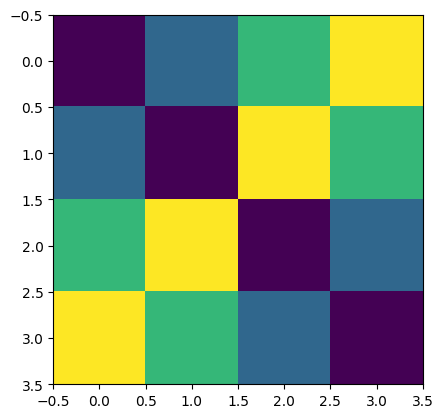

In [177]:
def generate_all_solutions(connection_matrix_function, num_squares):
    matrix = connection_matrix_function(num_squares)
    for row in matrix:
        if 0 in row:

    
    fails = []
    coin_strings = generate_hypercube_vertices(num_squares)
    for key_position in range(1,num_squares + 1):
        try: 
            for coin_string in coin_strings:
                initial_board = create_board_from_coins_list(coin_string)
                #print(initial_board, coin_string)
                flip_coin = flip_this_coin(key_position, coin_string, matrix)
                new_coin_list = flip_nth_bit(flip_coin, coin_string)
                new_board = create_board_from_coins_list(new_coin_list)
                new_colour = find_colour(new_coin_list, matrix)
                #print(f'key = {key_position}', f'initial board = {initial_board}', 
                    #f'flip {flip_coin}', f'new_board {new_board}', 
                    #f'new_colour {new_colour}')
                if key_position != new_colour:
                    fails.append(f'key = {key_position}, initial board = {initial_board}, flip {flip_coin}, new_board {new_board}, new_colour {new_colour}')
        except:
            fails.append(f'key = {key_position}, initial board = {initial_board}, flip {flip_coin}, new_board {new_board}, new_colour {new_colour}')

    if fails == []:
        return True, plt.imshow(matrix), matrix
    else: 
        return False, plt.imshow(matrix), matrix, fails
    
testing(generate_connection_matrix_alternate,4)

In [527]:
for row in [[1,1,3],[1,4,3]]:
    if 0 in row: print(False)

In [3]:
# Function to swap elements in the array
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

# Function to find the possible permutations. 
# Initial value of idx is 0.
def permutations(res, arr, idx):
  
    # Base case: if idx reaches the size of the array,
    # add the permutation to the result
    if idx == len(arr):
        res.append(arr[:])
        return

    # Permutations made by swapping each element
    for i in range(idx, len(arr)):
        swap(arr, idx, i)
        permutations(res, arr, idx + 1)
        swap(arr, idx, i)  # Backtracking

# Function to get the permutations
def permute(arr):
    res = []
    permutations(res, arr, 0)
    return res

# Driver code
arr = [1, 2, 3,4]
res = permute(arr)

# Printing result
for perm in res:
    print(" ".join(map(str, perm)))

1 2 3 4
1 2 4 3
1 3 2 4
1 3 4 2
1 4 3 2
1 4 2 3
2 1 3 4
2 1 4 3
2 3 1 4
2 3 4 1
2 4 3 1
2 4 1 3
3 2 1 4
3 2 4 1
3 1 2 4
3 1 4 2
3 4 1 2
3 4 2 1
4 2 3 1
4 2 1 3
4 3 2 1
4 3 1 2
4 1 3 2
4 1 2 3
